In [1]:
import numpy as np
import pyclesperanto_prototype as cle
from skimage.data import cells3d
from skimage.segmentation import morphological_chan_vese
import timeit
import stackview
from skimage.io import imread
cle.select_device("TX")

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

In [2]:
#image = cells3d()[:,0,...]
#cle.asarray(image)

In [3]:
def level_set_gpu():
    result_gpu = cle.morphological_snakes(image, num_iter=50, smoothing=0)

def level_set_cpu():
    result_cpu = morphological_chan_vese(image, num_iter=50, smoothing=0)

In [4]:
#time_in_s = timeit.timeit(level_set_gpu, number=3)
#print("GPU time = ", time_in_s)

In [5]:
#time_in_s = timeit.timeit(level_set_cpu, number=3)
#print("CPU time = ", time_in_s)

In [6]:
image2d = cells3d()[30,0,...]

cl.OCLArray([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
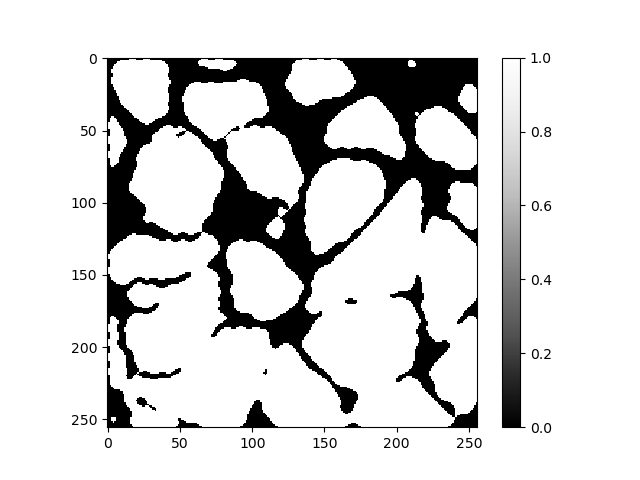
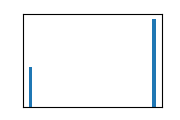

In [7]:
result_gpu = cle.morphological_snakes(image2d, num_iter=1, smoothing=10)
result_gpu

StackViewNDArray([[0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=int8)
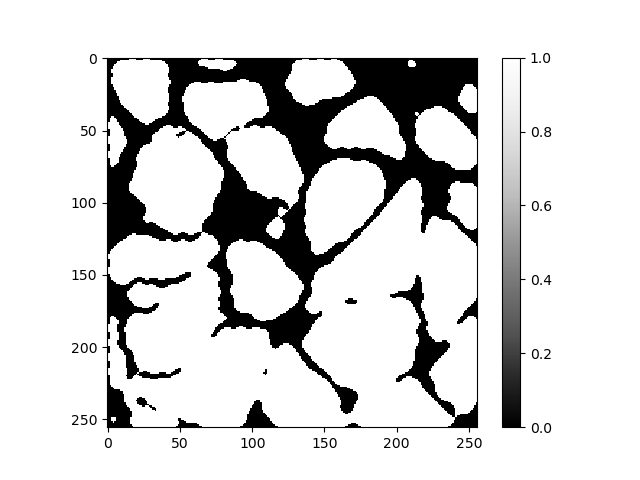
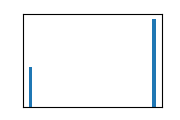

In [8]:
result_cpu = morphological_chan_vese(image2d, num_iter=1, smoothing=10)
stackview.insight(result_cpu)

In [9]:
#image1 = imread("test1.tif")
#image2 = imread("test2.tif")

stackview.curtain(result_cpu, np.asarray(result_gpu))
#stackview.curtain(image1, image2)

In [10]:
cle.array_equal(result_cpu, result_gpu)

True